In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

In [22]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, accuracy_score, precision_score, confusion_matrix


In [3]:
df = pd.read_csv('C:/Users/vinay/Desktop/Py/MLB/Final_pro/Santandar/train.csv') #training data

In [3]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [4]:
df['target'].value_counts()
#unbalanced data set

0    179902
1     20098
Name: target, dtype: int64

In [5]:
len(df)
cols = df.columns
num_col = df._get_numeric_data().columns
list(set(cols)-set(num_col))#checking for categorical data is any

['ID_code']

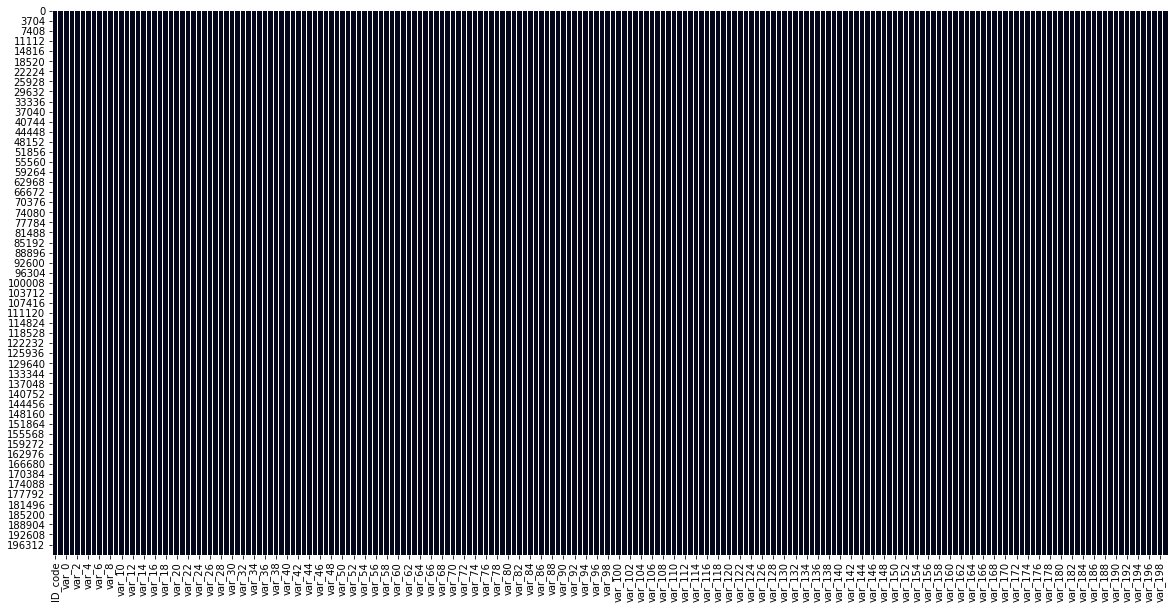

In [39]:
ax = plt.subplots(figsize=(20,10))
plot =sns.heatmap(df.isnull(), cbar=False)
plot.figure.savefig("plot.png")


In [20]:
corrmat = df.corr()

In [14]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)


var_191  var_75     2.703975e-08
var_75   var_191    2.703975e-08
var_173  var_6      5.942735e-08
var_6    var_173    5.942735e-08
var_126  var_109    1.313947e-07
                        ...     
var_128  var_128    1.000000e+00
var_127  var_127    1.000000e+00
var_126  var_126    1.000000e+00
var_124  var_124    1.000000e+00
var_199  var_199    1.000000e+00
Length: 40401, dtype: float64

In [24]:
so = s.sort_values(kind="quicksort", ascending = False)

False

In [15]:
so > 0.5

var_191  var_75     False
var_75   var_191    False
var_173  var_6      False
var_6    var_173    False
var_126  var_109    False
                    ...  
var_128  var_128     True
var_127  var_127     True
var_126  var_126     True
var_124  var_124     True
var_199  var_199     True
Length: 40401, dtype: bool

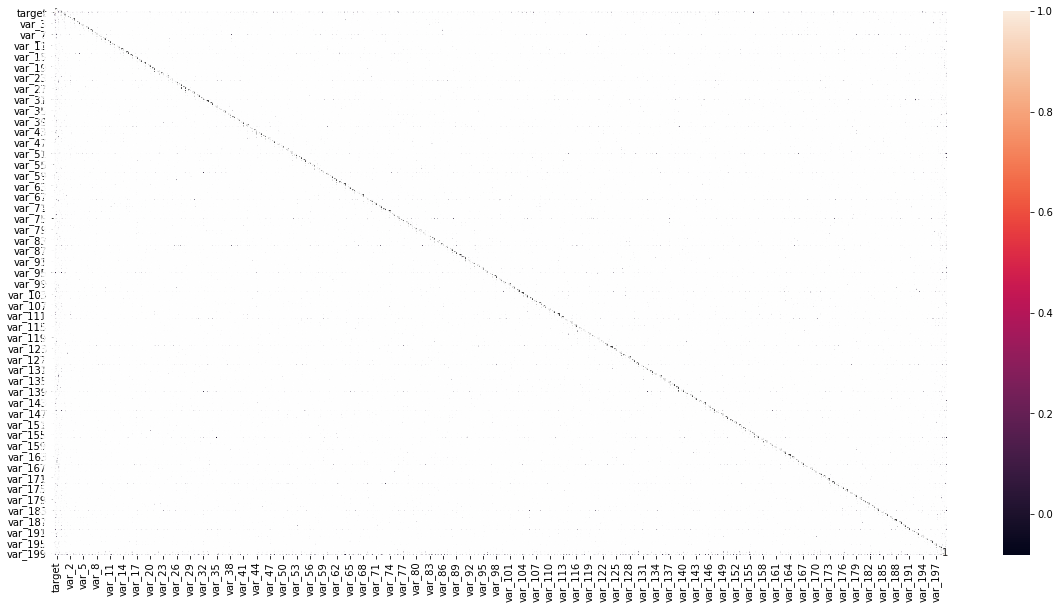

In [40]:
ax = plt.subplots(figsize=(20,10))
x = sns.heatmap(corrmat, annot=True)
plt.show()

In [6]:
df_n = df[df.columns[3:202]]
df_n # dataframe containing all x-variables
df_y = df[df.columns[1:2]]
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
199995,0
199996,0
199997,0
199998,0


In [7]:
c_name = df[:0]
c_name =  c_name[c_name.columns[3:202]]
c_name

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [8]:
#train and test data that will be used for modelling
x_train, x_test, y_train, y_test = train_test_split(df_n, df_y, test_size=0.3, random_state=0,stratify = df_y)
y_train=y_train.astype('int')
y_test = y_test.astype('int')
#use stratify for y or df

In [9]:
print(y_test['target'].value_counts())
#unbalanced data set..checking for equal proportion distribution of target records
weight =  53971/6029
print(weight)

0    53971
1     6029
Name: target, dtype: int64
8.951899154088572


In [10]:
#feature selection using chi squared test
X_norm = MinMaxScaler().fit_transform(x_train)
chi_selector = SelectKBest(chi2, k=73)
chi_selector.fit(X_norm, y_train.values.ravel())
chi_support = chi_selector.get_support()
chi_feature = x_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

73 selected features


In [11]:
#anova f-test
fs = SelectKBest(score_func=f_classif, k=73)
fs.fit(X_norm, y_train.values.ravel())
fs_support = fs.get_support()
fs_feature = x_train.loc[:,fs_support].columns.tolist()
print(str(len(fs_feature)), 'selected features')

73 selected features


In [12]:
# rfe with logistic regression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=73, step=50, verbose=5)
rfe_selector.fit(X_norm, y_train.values.ravel())
rfe_support = rfe_selector.get_support()
rfe_feature = x_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 199 features.
Fitting estimator with 149 features.
Fitting estimator with 99 features.
73 selected features


In [15]:
col_name = list(x_train.columns.values)
feature_selection_df = pd.DataFrame({'Feature':col_name, 'F1 Score':fs_support, 'Chi^2':chi_support, 'RFE':rfe_support,})
feature_selection_df
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
final_features = feature_selection_df[feature_selection_df['Total']==3]
cols = list(final_features['Feature'])
cols
#feature_selection_df..66 variables
x_train_final = x_train[['var_99',
 'var_95',
 'var_94',
 'var_92',
 'var_91',
 'var_9',
 'var_89',
 'var_87',
 'var_86',
 'var_81',
 'var_80',
 'var_78',
 'var_76',
 'var_75',
 'var_71',
 'var_67',
 'var_6',
 'var_53',
 'var_44',
 'var_40',
 'var_36',
 'var_35',
 'var_34',
 'var_33',
 'var_26',
 'var_22',
 'var_21',
 'var_2',
 'var_198',
 'var_197',
 'var_192',
 'var_191',
 'var_190',
 'var_188',
 'var_184',
 'var_18',
 'var_179',
 'var_174',
 'var_173',
 'var_172',
 'var_170',
 'var_169',
 'var_166',
 'var_165',
 'var_164',
 'var_155',
 'var_154',
 'var_149',
 'var_148',
 'var_147',
 'var_146',
 'var_139',
 'var_133',
 'var_13',
 'var_127',
 'var_123',
 'var_122',
 'var_121',
 'var_12',
 'var_118',
 'var_115',
 'var_110',
 'var_109',
 'var_108',
 'var_107',
 'var_1']]

In [16]:
final_features

,Feature,F1 Score,Chi^2,RFE,Total
1,var_99,True,True,True,3
2,var_95,True,True,True,3
3,var_94,True,True,True,3
4,var_92,True,True,True,3
5,var_91,True,True,True,3
...,...,...,...,...,...
63,var_110,True,True,True,3
64,var_109,True,True,True,3
65,var_108,True,True,True,3
66,var_107,True,True,True,3


In [12]:
x_train_final

,var_99,var_95,var_94,var_92,var_91,var_9,var_89,var_87,var_86,var_81,...,var_122,var_121,var_12,var_118,var_115,var_110,var_109,var_108,var_107,var_1
156342,0.1762,0.3178,10.0461,4.5116,7.1353,7.5203,1.6812,11.8357,10.5309,12.4371,...,3.4697,11.8630,13.7807,10.4596,1.5720,5.9198,19.5514,14.2534,6.1717,1.4726
172870,0.4322,1.4406,13.1038,18.2818,7.3557,8.9042,2.8194,5.9312,7.7569,11.1761,...,2.4034,11.4588,14.0615,-8.7710,-0.9714,10.7297,22.0710,14.3517,18.3020,-3.6031
112796,2.3062,0.2859,8.7144,17.9484,6.9343,8.8677,2.3871,24.9544,11.7974,14.8031,...,2.7280,12.6559,14.1860,-13.7791,3.7155,-0.3633,24.4346,14.3100,13.8514,-4.2684
138419,1.6204,0.1297,16.0549,10.6162,7.0993,7.4399,-0.0854,-0.1684,5.9456,15.0774,...,1.3549,12.1938,14.1047,-13.4242,5.5105,-0.6469,14.8091,14.0395,16.4811,-2.8193
39856,1.5966,-0.2778,10.4330,13.0400,6.8094,7.3758,-1.9881,2.7691,-9.0200,14.8011,...,2.8369,9.8655,14.1150,-15.3213,-1.1308,5.1938,24.2269,14.2755,1.2083,1.7689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54403,-1.6609,-0.1924,8.0795,10.8022,7.0879,6.9348,7.1249,13.1854,13.7344,17.7892,...,6.6999,13.1665,14.2247,-9.8728,-0.6683,10.7808,23.0714,14.2627,18.1593,3.4909
91207,-4.4491,0.4022,14.3485,16.1377,7.0899,6.8907,5.8097,12.1989,6.4759,14.5144,...,-0.6097,9.6620,13.8193,2.0475,4.1230,9.5121,27.7122,14.1997,22.0682,-5.9754
81494,-0.6463,-0.4260,9.3280,7.1756,7.1291,7.6658,3.2027,5.6171,11.2555,12.7742,...,9.6943,11.2327,13.8525,-9.0284,3.1712,-0.3959,22.3875,14.2886,25.4486,3.1423
169303,-0.9954,0.1289,7.8489,16.4055,7.0460,7.6070,12.2114,5.9365,7.7921,16.8899,...,-1.1834,9.8549,13.8026,9.3447,3.3038,9.7278,9.0921,14.0766,17.5897,-4.7628


In [17]:
#doing PCA....on dataset from kaggle
from sklearn.decomposition import PCA
pca_gen = PCA(0.90,svd_solver='full')
pca_fit_gen = pca_gen.fit_transform(x_train_final)
pca_fit_gen
principalDf = pd.DataFrame(data = pca_fit_gen
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                         'pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27',
                         'pc28','pc29','pc30','pc31','pc32','pc33'])
pca_gen.explained_variance_ratio_
principalDf # training data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33
0,3.279300,4.254080,-16.308686,-2.491668,11.145414,-2.029186,-5.676229,-5.315843,3.306388,13.649257,...,5.046722,1.200175,0.987315,-3.833299,9.870931,-5.580957,-0.271766,0.073078,3.793583,-7.912373
1,0.478656,-4.020492,3.974210,1.459771,-1.085538,3.441473,-6.712098,3.882284,1.460677,-3.669981,...,0.218918,1.891003,0.041177,3.134757,-6.084502,1.255013,-1.634759,5.013932,-5.507533,4.956141
2,10.116862,-8.360444,8.719824,-4.209582,-0.805652,2.661512,-5.192631,2.723481,6.066167,-7.975839,...,-2.815727,1.698815,1.050995,-3.024749,-2.762959,-4.165009,2.894063,7.418145,-1.732464,5.011992
3,-22.686829,7.849696,9.126353,6.800624,10.603236,-8.734488,-16.645523,4.144991,-0.603110,-1.654711,...,3.348399,-0.538092,-5.168974,2.410149,-6.059874,0.053604,0.562880,-3.679844,-0.683457,-1.834312
4,17.428611,12.318086,8.907626,-18.511070,15.389569,-7.272466,9.346196,-2.508885,-13.130081,-5.478982,...,-2.575499,2.686543,4.640062,13.175387,1.532657,1.450009,1.486386,4.686198,5.862078,0.380300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,12.580208,-1.633628,4.232291,0.180411,0.023005,11.571233,14.142771,2.652721,8.056223,1.967776,...,6.604236,3.820023,-5.751216,-7.802492,-1.404918,-6.989531,1.509325,4.303455,2.745871,-1.919019
139996,2.517838,-11.122568,-6.637271,3.286564,6.616115,7.484565,-7.287087,-8.868872,2.229440,-3.307934,...,-4.080527,-1.148070,4.433906,6.240824,5.001912,-4.595088,-1.821948,8.453469,3.155229,3.068929
139997,-11.130880,3.227017,2.885893,-3.473621,-5.934782,-6.702297,13.511412,-4.802837,6.506555,3.411515,...,-3.775406,9.418456,2.152033,-0.673863,9.300673,-0.696869,-6.531284,1.005676,6.998883,-5.540489
139998,10.600092,0.988003,-15.056114,-8.144288,4.611165,18.875007,-7.506435,2.925534,0.965742,11.690295,...,3.953190,-2.793959,-1.181529,-1.835582,-6.661246,2.017842,0.936891,-8.530851,-3.072125,3.981970


In [18]:
x_test_final = x_test[['var_99',
 'var_95',
 'var_94',
 'var_92',
 'var_91',
 'var_9',
 'var_89',
 'var_87',
 'var_86',
 'var_81',
 'var_80',
 'var_78',
 'var_76',
 'var_75',
 'var_71',
 'var_67',
 'var_6',
 'var_53',
 'var_44',
 'var_40',
 'var_36',
 'var_35',
 'var_34',
 'var_33',
 'var_26',
 'var_22',
 'var_21',
 'var_2',
 'var_198',
 'var_197',
 'var_192',
 'var_191',
 'var_190',
 'var_188',
 'var_184',
 'var_18',
 'var_179',
 'var_174',
 'var_173',
 'var_172',
 'var_170',
 'var_169',
 'var_166',
 'var_165',
 'var_164',
 'var_155',
 'var_154',
 'var_149',
 'var_148',
 'var_147',
 'var_146',
 'var_139',
 'var_133',
 'var_13',
 'var_127',
 'var_123',
 'var_122',
 'var_121',
 'var_12',
 'var_118',
 'var_115',
 'var_110',
 'var_109',
 'var_108',
 'var_107',
 'var_1']]
pca_fit_test = pca_gen.fit_transform(x_test_final)
x_pca_test = pd.DataFrame(data = pca_fit_test
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                         'pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27',
                         'pc28','pc29','pc30','pc31','pc32','pc33'])
#pca_gen.explained_variance_ratio_
x_pca_test

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33
0,15.331047,5.326056,8.175642,-10.869594,0.228691,-8.683575,15.100886,-1.210022,-2.533002,-14.576020,...,-4.278156,-10.212529,0.924185,-1.513798,-1.255290,5.245361,-4.171166,4.736202,-0.091557,4.776396
1,-0.711951,4.285189,-18.338050,12.302447,-0.084353,0.169700,-6.069917,-2.144021,-1.392334,-9.348193,...,-3.550707,3.706405,11.264062,-4.349581,1.568306,2.716593,-0.725323,-5.010148,9.060970,-8.250304
2,1.416179,8.601998,-16.172612,-11.342098,-5.445144,3.154176,-7.877238,9.136021,-4.651661,1.290453,...,-1.758911,-0.550126,-5.699838,-1.785050,2.845172,-3.532769,-4.316780,-3.514959,-0.470884,0.997553
3,-14.359324,-1.278975,-11.485410,9.694374,0.510006,-16.685366,-1.898855,12.447721,-2.060337,0.687483,...,1.260161,6.170197,-2.816109,-2.026711,1.283024,-7.438355,1.683423,-5.336290,0.175488,-3.432848
4,-16.487033,8.841966,-20.010471,-9.470374,-7.111118,6.135277,17.099981,13.113418,9.845880,-4.181622,...,5.212859,2.887554,-0.812039,-5.785471,-4.711210,1.002773,1.007010,8.480528,0.587409,-4.925809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-4.391626,-9.281720,0.699890,8.041047,-8.859053,-14.147226,6.671988,8.278094,2.803178,3.194355,...,-2.479534,-7.686961,4.439569,-4.115149,1.476559,-4.517425,1.575490,-0.196068,-5.307884,0.454802
59996,0.953808,-4.823467,15.254820,11.579746,7.730704,-3.740245,7.121176,-1.905805,3.668095,11.359741,...,0.935235,-4.761541,1.568300,0.209020,1.237972,8.066723,-4.563700,1.285232,1.301703,-8.183956
59997,-1.500006,7.999163,-14.525650,2.524019,-13.342855,-13.147252,0.211733,9.460075,-0.804785,5.401620,...,-7.003381,1.866280,-3.919463,6.457543,-2.189275,-7.333846,-3.151928,-0.623156,3.909057,-6.767878
59998,2.808516,3.637383,-1.652948,20.664996,12.306585,7.533076,7.428237,6.845505,11.327125,5.319490,...,-0.178941,8.103816,-0.108459,3.298439,1.624099,-4.294001,-3.610649,-1.164280,4.537469,-0.906532


In [19]:
#LOGIT MODEL
#Grid Search
clf = LogisticRegression(n_jobs=-1)
grid_values = {'C':[1],'class_weight':['balanced'],'penalty':['l2'],
               'solver':['liblinear'],'max_iter':[100],'random_state':[1]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train_final, y_train.values.ravel())

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test_final)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test.values.ravel(),y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test.values.ravel(),y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test.values.ravel(),y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(y_test,y_pred_acc))
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)

Accuracy Score : 0.7444666666666667
Precision Score : 0.24555549477599695
Recall Score : 0.7445679217117267
F1 Score : 0.36931303990127523
[[40179 13792]
 [ 1540  4489]]
0.7385038142788674
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear'}


In [20]:
print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

F1 Score : 0.36931303990127523


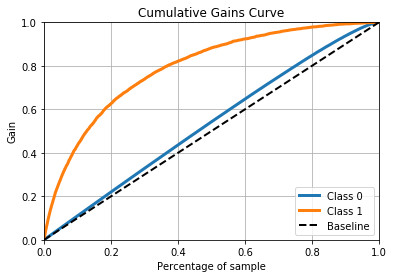

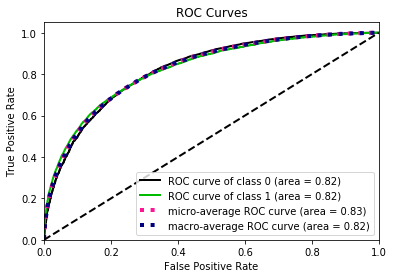

In [40]:
log_prob = grid_clf_acc.predict_proba(x_test_final)
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, log_prob)
skplt.metrics.plot_roc_curve(y_test, log_prob)
plt.show()

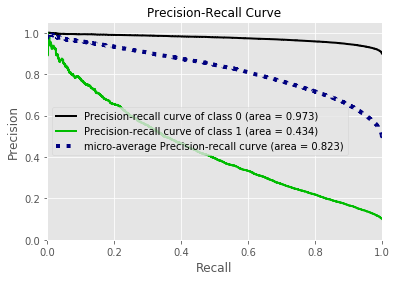

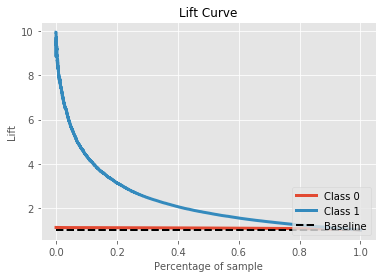

In [83]:
skplt.metrics.plot_precision_recall(y_test, log_prob)
skplt.metrics.plot_lift_curve(y_test, log_prob)
plt.show()

In [39]:
y_scores = grid_clf_acc.predict_proba(x_test_final)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores)
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    

precision_recall_threshold(p, r, thresholds, 0.40)

     pred_neg  pred_pos
neg     34154     19817
pos      1026      5003


In [70]:
#decsion trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
dt = DecisionTreeClassifier(class_weight= 'balanced', criterion ='entropy', max_depth= 5, 
                             max_features= 'auto', splitter='best', random_state =3 )
dt.fit(principalDf, y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=3, splitter='best')

In [41]:
#grid based decision tree model
grid_dt = DecisionTreeClassifier()
#sk_dt = StratifiedKFold(n_splits=5)
grid_values_dt = {'criterion':['gini'],'max_depth':[4],'splitter':['best','random'],'min_samples_split':[2],
                  'min_samples_leaf':[1]
              ,'class_weight':['balanced'], 'max_features':['auto'],'random_state':[3]}
grid_clf_acc_dt = GridSearchCV(grid_dt, param_grid = grid_values_dt,scoring = 'recall')
grid_clf_acc_dt.fit(x_train_final, y_train.values.ravel())

#Predict values based on new parameters
y_pred_acc_dt = grid_clf_acc_dt.predict(x_test_final)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test.values.ravel(),y_pred_acc_dt)))
print('Precision Score : ' + str(precision_score(y_test.values.ravel(),y_pred_acc_dt)))
print('Recall Score : ' + str(recall_score(y_test.values.ravel(),y_pred_acc_dt)))
#print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(y_test,y_pred_acc_dt))
print(grid_clf_acc_dt.best_score_)
print(grid_clf_acc_dt.best_params_)

Accuracy Score : 0.47468333333333335
Precision Score : 0.12609282403332747
Recall Score : 0.7128877094045447
[[24183 29788]
 [ 1731  4298]]
0.6718280265929507
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 3, 'splitter': 'best'}


In [42]:
print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc_dt)))


F1 Score : 0.21428393369063944


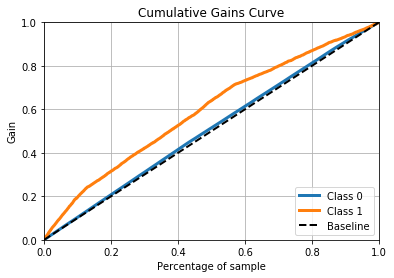

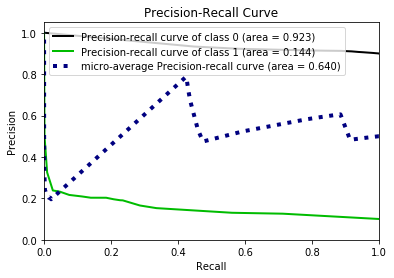

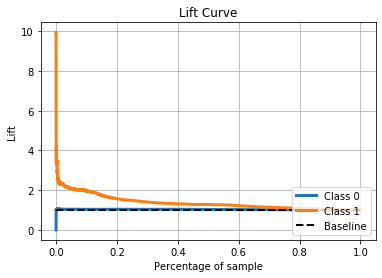

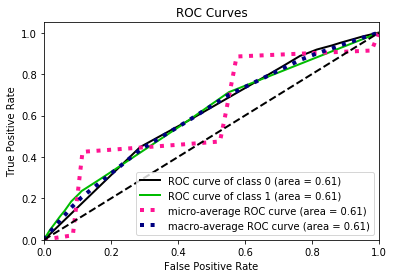

In [44]:
dt_prob = grid_clf_acc_dt.predict_proba(x_test_final)
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, dt_prob)
skplt.metrics.plot_precision_recall(y_test, dt_prob)
skplt.metrics.plot_lift_curve(y_test, dt_prob)
skplt.metrics.plot_roc_curve(y_test, dt_prob)


plt.show()

In [95]:
y_scores_dt = grid_clf_acc_dt.predict_proba(x_test_final)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores_dt)
def adjusted_classes_dt(y_scores_dt, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores_dt]

def precision_recall_threshold_dt(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes_dt(y_scores_dt, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    

precision_recall_threshold_dt(p, r, thresholds, 0.4)

     pred_neg  pred_pos
neg     24183     29788
pos      1731      4298


In [45]:
#grid based decision RANDOM FOREST
grid_rf = RandomForestClassifier(n_jobs = -1)
grid_values_rf = {'n_estimators':[50],'criterion':['entropy'],'max_depth':[4]
                 ,'max_features':['auto'],'class_weight':['balanced'],'random_state':[0]}
grid_clf_acc_rf = GridSearchCV(grid_rf, param_grid = grid_values_rf,scoring = 'recall')
grid_clf_acc_rf.fit(x_train_final, y_train.values.ravel())

#Predict values based on new parameters
y_pred_acc_rf = grid_clf_acc_rf.predict(x_test_final)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test.values.ravel(),y_pred_acc_rf)))
print('Precision Score : ' + str(precision_score(y_test.values.ravel(),y_pred_acc_rf)))
print('Recall Score : ' + str(recall_score(y_test.values.ravel(),y_pred_acc_rf)))
#print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(y_test,y_pred_acc_rf))
print(grid_clf_acc_rf.best_score_)
print(grid_clf_acc_rf.best_params_)

Accuracy Score : 0.6999833333333333
Precision Score : 0.19402985074626866
Recall Score : 0.6296234864820036
[[38203 15768]
 [ 2233  3796]]
0.6210105078689635
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 0}


In [46]:
print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc_rf)))

F1 Score : 0.2966436134880631


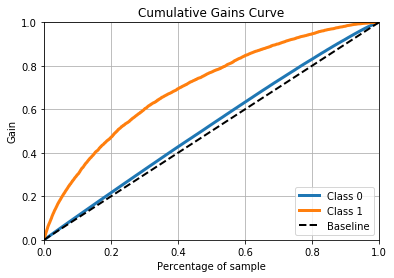

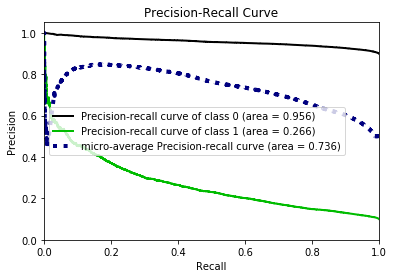

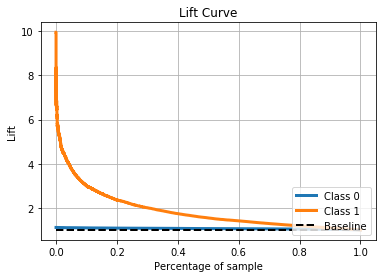

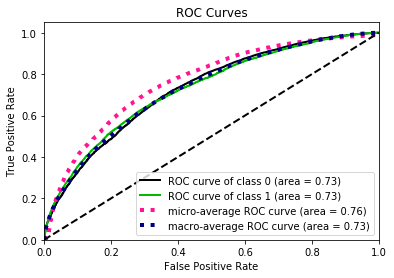

In [47]:
rf_prob = grid_clf_acc_rf.predict_proba(x_test_final)
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, rf_prob)
skplt.metrics.plot_precision_recall(y_test, rf_prob)
skplt.metrics.plot_lift_curve(y_test, rf_prob)
skplt.metrics.plot_roc_curve(y_test, rf_prob)

plt.show()

In [103]:
y_scores_rf = grid_clf_acc_rf.predict_proba(x_test_final)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores_rf)
def adjusted_classes_rf(y_scores_rf, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores_rf]

def precision_recall_threshold_rf(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes_rf(y_scores_rf, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    

precision_recall_threshold_rf(p, r, thresholds, 0.45)

     pred_neg  pred_pos
neg     19403     34568
pos       702      5327


In [ ]:
#KNN MODEL
grid_knn = KNeighborsClassifier() 
grid_values_knn = {'n_neighbors':[5,6,7],'weights':['uniform','distance'],'algorithm':['auto','kd_tree','ball_tree']}
grid_clf_acc_knn = GridSearchCV(grid_knn, param_grid = grid_values_knn,scoring = 'recall')
grid_clf_acc_knn.fit(principalDf, y_train.values.ravel())

#Predict values based on new parameters
y_pred_acc_knn = grid_clf_acc_knn.predict(x_pca_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test.values.ravel(),y_pred_acc_knn)))
print('Precision Score : ' + str(precision_score(y_test.values.ravel(),y_pred_acc_knn)))
print('Recall Score : ' + str(recall_score(y_test.values.ravel(),y_pred_acc_knn)))
#print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(y_test,y_pred_acc_knn))
print(grid_clf_acc_knn.best_score_)
print(grid_clf_acc_knn.best_params_)

In [ ]:
#grid based decision xgboost
grid_xg = XGBClassifier()
grid_values_xg = {'scale_pos_weight':[2,3,weight],'max_depth':[4,5,6,7,8,9,10],'eta':[0.5,0.4,0.3,0.1,0.05]
                 ,'objective' : ['binary:logistic','reg:logistic','reg:squarederror','binary:logitraw'],
                 'gamma':[1,2,3,4,5,6],'booster':['gbtree','dart','gblinear']}
grid_clf_acc_xg = GridSearchCV(grid_xg, param_grid = grid_values_xg,scoring = 'recall')
grid_clf_acc_xg.fit(principalDf, y_train.values.ravel())

#Predict values based on new parameters
y_pred_acc_xg = grid_clf_acc_xg.predict(x_pca_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test.values.ravel(),y_pred_acc_xg)))
print('Precision Score : ' + str(precision_score(y_test.values.ravel(),y_pred_acc_xg)))
print('Recall Score : ' + str(recall_score(y_test.values.ravel(),y_pred_acc_xg)))
#print('F1 Score : ' + str(f1_score(y_test.values.ravel(),y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print(confusion_matrix(y_test,y_pred_acc_xg))
print(grid_clf_acc_xg.best_score_)
print(grid_clf_acc_xg.best_params_)